In [2]:
from AROMA import *
from AROMA.utils import *
from AROMA.config import *
import pandas as pd
%matplotlib widget

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
print('def: find_nearest(array, value)')

def powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    shifted7=amp1*shift(sinepw,shift7)
    shifted8=amp2*shift(sinepw,shift8)
    shifted9=amp3*shift(sinepw,shift9)
    shifted10=amp4*shift(sinepw,shift10)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6+shifted7+shifted8+shifted9+shifted10
print('def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)')

def powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6
print('def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)')

def powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    return shifted1+shifted2+shifted3+shifted4
print('def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)')
      
def powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    return shifted1+shifted2+shifted3
print('def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)')
      
def powerfuncsingle(hpp,amp1,shift1):
    shifted1=amp1*shift(sinepw,shift1)
    return shifted1
print('def: powerfuncsingle(hpp,amp1,shift1)')

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir

def: find_nearest(array, value)
def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)
def: powerfuncsingle(hpp,amp1,shift1)


'/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping'

In [82]:
data = pd.read_csv(data_path, header=0, delimiter='\t')
plotPath = join(homedir, 'plots')

# data = data.query('TIME < 2293') # first half of sector 36 
# data = data.query('TIME > 2293 & TIME < 2306') # second half of sector 36 
# data = data.query('TIME < 2306') # full of sector 36

# data = data.query('TIME > 2306 & TIME < 2320') # first half of sector  37 
# data = data.query('TIME > 2320') # second half of sector  37 
# data = data.query('TIME > 2306') # full of sector 37

data = data # full light curve
data.TIME = data.TIME*24 
fit_dir = join(homedir,'notebooks', 'periodSineFit_metadata')

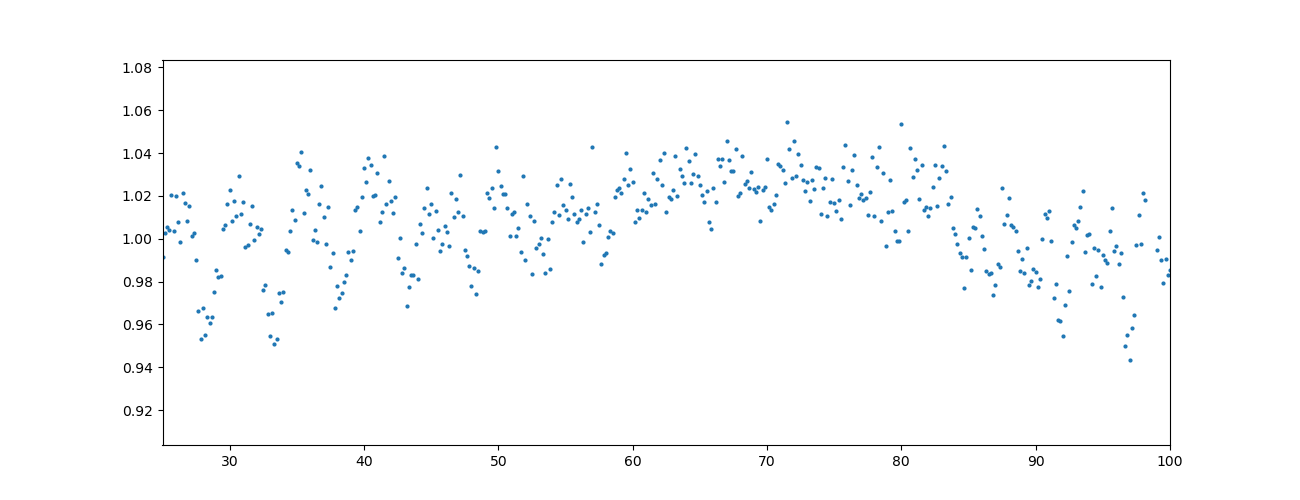

In [35]:
plt.figure(figsize=(13, 5))
plt.plot(time, lc, ls='', marker='o', ms=2.0)
plt.xlim((25,100))
subset = data.iloc[np.where(np.logical_and(time < 100, time > 25))[0]]
# subset.to_csv(join(homedir, 'data/processed', 'luhman16_subset_25-100hr.csv'), sep=',', index=False)

In [121]:
def sixsines(a1, p1, a2, p2, a3, p3, a4, p4, a5, p5, a6, p6, time):
    periods = np.array([4.58, 4.68, 4.98, 5.21, 5.26, 5.34])
    freq = 1/periods
    sine1 = a1 * np.sin(freq[0] * time + p1)
    sine2 = a2 * np.sin(freq[1] * time + p2)
    sine3 = a3 * np.sin(freq[2] * time + p3)
    sine4 = a4 * np.sin(freq[3] * time + p4)
    sine5 = a5 * np.sin(freq[4] * time + p5)
    sine6 = a6 * np.sin(freq[5] * time + p6)
    return sine1 + sine2 + sine3 + sine4 + sine5 + sine6

def threesines (a1, p1, a2, p2, a3, p3, time):
    periods = np.array([4.68, 4.98, 5.26])
    f = 24/periods
    sine1 = a1 * np.sin(f[0] * time + p1)
    sine2 = a2 * np.sin(f[1] * time + p2)
    sine3 = a3 * np.sin(f[2] * time + p3)
    # print("%f*sin(%f*t + %f) + %f*sin(%f*t + %f) + %f*sin(%f*t + %f)"%(a1, f[0], p1, a2, f[1], p2, a3, f[2], p3))
    return sine1 + sine2 + sine3
    

In [134]:
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand

# objective function
def objective(a1, p1, a2, p2, a3, p3, time):
    periods = np.array([4.68, 4.98, 5.26])
    f = 24/periods
    sine1 = a1 * np.sin(f[0] * time + p1)
    sine2 = a2 * np.sin(f[1] * time + p2)
    sine3 = a3 * np.sin(f[2] * time + p3)
    # print("%f*sin(%f*t + %f) + %f*sin(%f*t + %f) + %f*sin(%f*t + %f)"%(a1, f[0], p1, a2, f[1], p2, a3, f[2], p3))
    return sine1 + sine2 + sine3

# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
		# extract the substring
		start, end = i * n_bits, (i * n_bits)+n_bits
		substring = bitstring[start:end]
		# convert bitstring to a string of chars
		chars = ''.join([str(s) for s in substring])
		# convert string to integer
		integer = int(chars, 2)
		# scale integer to desired range
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		# store
		decoded.append(value)
	return decoded

# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	# initial population of random bitstring
	pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
	# keep track of best solution
	best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
	# enumerate generations
	for gen in range(n_iter):
		# decode population
		decoded = [decode(bounds, n_bits, p) for p in pop]
		# evaluate all candidates in the population
		scores = [objective(d) for d in decoded]
		# check for new best solution
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))
		# select parents
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# create the next generation
		children = list()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop = children
	return [best, best_eval]

# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))
# perform the genetic algorithm search
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

TypeError: objective() missing 6 required positional arguments: 'p1', 'a2', 'p2', 'a3', 'p3', and 'time'

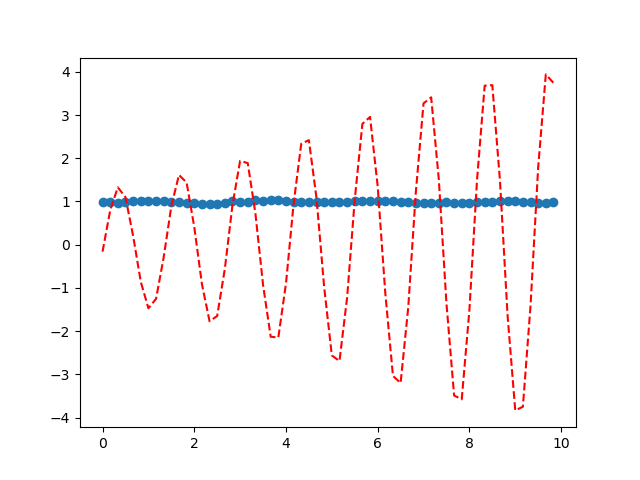

In [127]:
subset = data[(data.TIME-data.TIME.iloc[0]) <= 10]
time = subset.TIME - subset.TIME.iloc[0]
lc = subset.PSF_FLUX_NORM
elc = subset.PSF_EFLUX
# scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(- inf, inf), method=None, jac=None, *, full_output=False, **kwargs)

## Fitting 
# Parameter bounds: bound for a1, p1, a2, p2, a3, p3 in order
lowerbound = [0, -np.inf, 0, -np.inf, 0, -np.inf]
upperbound = [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]

popt, _ = curve_fit(threesines, time, lc, bounds=(lowerbound, upperbound), method='trf')
a1, p1, a2, p2, a3, p3 = popt
fit3sine_lc = threesines(a1, p1, a2, p2, a3, p3, time)

plt.figure()
plt.scatter(time, lc)
plt.plot(time, fit3sine_lc, '--', color='red')
plt.show()

# params = [6.94290510e-02,  7.89276353e+00,  5.77807216e-03,  3.48996119e+02,
#         2.39220236e-02,  2.95572203e+01,  3.92266564e-02, -2.67958914e+01,
#         4.43804414e-02,  2.90885955e+02,  2.95340884e-02,  1.35318548e+02]

# a, shift=[], []
# for i, val in enumerate(params):
#     if i%2==0: a.append(val)
#     else: shift.append(val)

# t = np.linspace(0, 10, 10000)

# s = sixsines(amplitudes=a, phase=shift, time=t)
# plt.figure(figsize=(13,5))
# plt.plot(t, s+1)
# plt.plot(time, lc, ls='', marker='o')
# plt.xlim((0,10))

In [114]:
popt

array([ 0.11394161, -3.27077162, -1.12616082,  3.68388304,  5.78015053,
       -0.53603426])

In [77]:
y = data.TIME-data.TIME.iloc[0] < 10

True

In [84]:
 data[(data.TIME-data.TIME.iloc[0]) <= 10]

,TIME,PSF_FLUX_NORM,PSF_EFLUX,X_POSITION,Y_POSITION,DQUALITY
0,54784.986011,0.983842,0.046241,540.1845,156.2486,0
1,54785.152681,0.978235,0.045977,540.1848,156.2499,0
2,54785.319352,0.972381,0.045702,540.1859,156.2506,0
3,54785.486022,0.982710,0.046187,540.1861,156.2501,0
4,54785.652692,1.008040,0.047378,540.1855,156.2504,0
5,54785.819363,1.003333,0.047157,540.1855,156.2503,0
6,54785.986033,1.004774,0.047224,540.1859,156.2508,0
7,54786.152703,1.014156,0.047665,540.1853,156.2493,0
8,54786.319374,1.003743,0.047176,540.1869,156.2514,0
9,54786.486044,0.991584,0.046604,540.1850,156.2481,0
